In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv")
df_co = pd.read_excel(r"F:\data science\Project\7. Final project\Zomoto\Country-Code.xlsx")

In [24]:
df_co 

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [25]:
for i in df_co["Country"]:
    print(f'"{i}":',end=',')

"India":,"Australia":,"Brazil":,"Canada":,"Indonesia":,"New Zealand":,"Phillipines":,"Qatar":,"Singapore":,"South Africa":,"Sri Lanka":,"Turkey":,"UAE":,"United Kingdom":,"United States":,

In [26]:
df.dropna(inplace=True)

In [27]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [28]:
cur = {"India": 1,"Australia": 54.36,"Brazil":16.63,"Canada":61.72,"Indonesia":0.0053,"New Zealand":49.75,"Phillipines":1.48,"Qatar":22.90,"Singapore":61.81,
       "South Africa":4.48,"Sri Lanka":0.28,"Turkey":2.58,"UAE":22.71,"United Kingdom":105.28,"United States":83.38}

df_all = pd.merge(df,df_co,on="Country Code",how="inner")
df_all["INR_currency"] = (df_all["Country"].map(cur)*df_all["Average Cost for two"]).astype(int)
df_all["City"] = df_all["City"].str.lower().str.title()
df_all.drop(["Restaurant ID","Country Code","Address","Locality Verbose","Rating color"],axis=1,inplace=True)
df_all.drop(df_all[df_all["Average Cost for two"] == 0].index,axis=0,inplace=True)
df_all.drop_duplicates(inplace=True)

In [29]:
# Splitting the cuisines column into individual cuisines
df_exploded = df_all.copy()
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.split(',')
df_exploded = df_exploded.explode('Cuisines')
df_exploded.drop(df_exploded[df_exploded["Average Cost for two"] == 0].index,axis=0,inplace=True)

df_exploded.head(3)

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,Country,INR_currency
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1628
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,Japanese,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1628
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,Desserts,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314,Phillipines,1628


# Statistical Analysis

In [30]:
def check_normality(i,data):
    from scipy import stats
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print(f" {i}: Reject null hypothesis >> The data is not normally distributed")
    else:
        print(f" {i}: Fail to reject null hypothesis >> The data is normally distributed")

In [31]:
# check_normality
for i in df_exploded.columns:
    if ((df_exploded[i].dtype == 'float64') | (df_exploded[i].dtype == 'int64')):
        check_normality(i, df_exploded[i])

p value:0.0000
 Longitude: Reject null hypothesis >> The data is not normally distributed
p value:0.0000
 Latitude: Reject null hypothesis >> The data is not normally distributed
p value:0.0000
 Average Cost for two: Reject null hypothesis >> The data is not normally distributed
p value:0.0000
 Price range: Reject null hypothesis >> The data is not normally distributed
p value:0.0000
 Aggregate rating: Reject null hypothesis >> The data is not normally distributed
p value:0.0000
 Votes: Reject null hypothesis >> The data is not normally distributed


C:\Users\nisha\AppData\Local\Temp\ipykernel_6228\1538942475.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19671.
  test_stat_normality, p_value_normality=stats.shapiro(data)


In [32]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df_exploded, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df_exploded, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df_exploded, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

before Skewness for Longitude is -2.9026423780089297


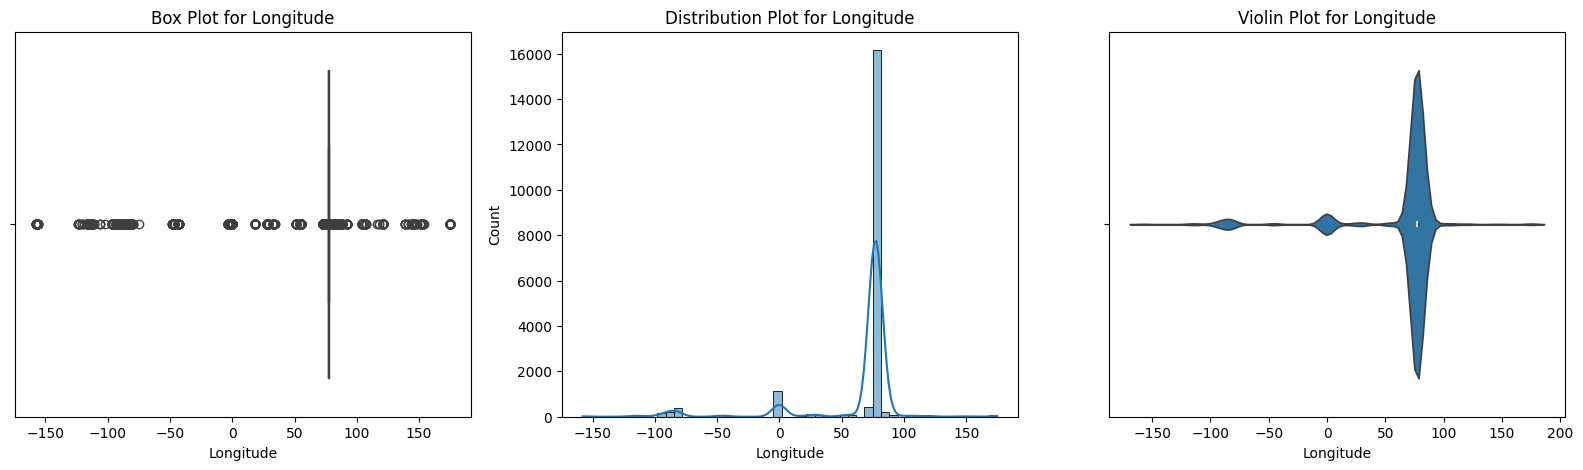

before Skewness for Latitude is -3.0830693358303347


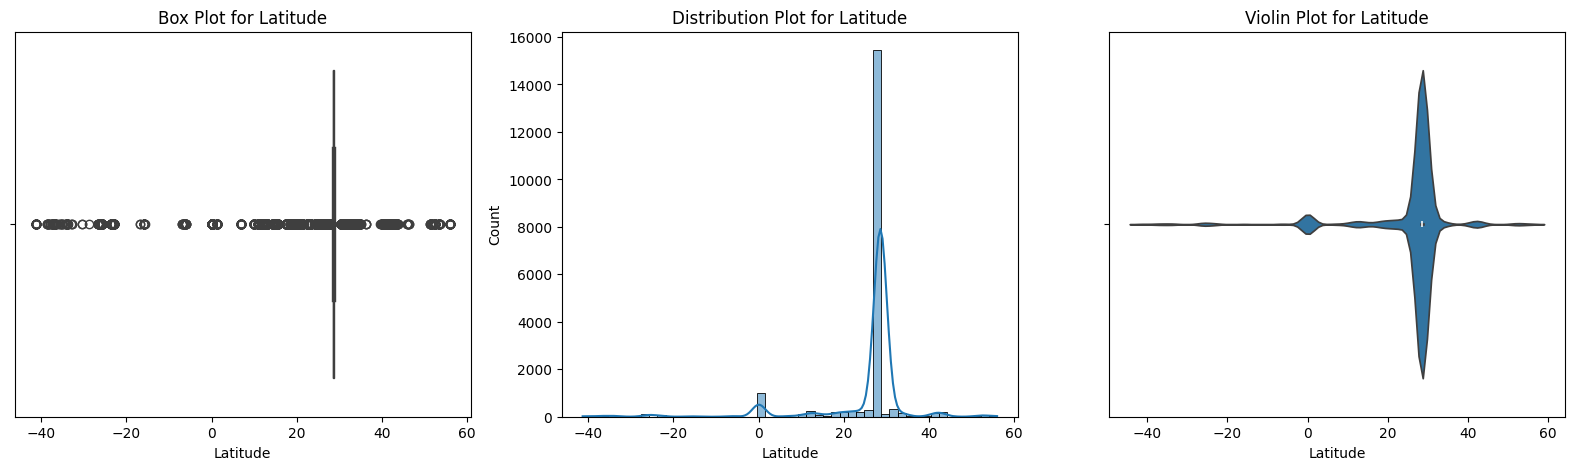

before Skewness for Average Cost for two is 35.48430642285956


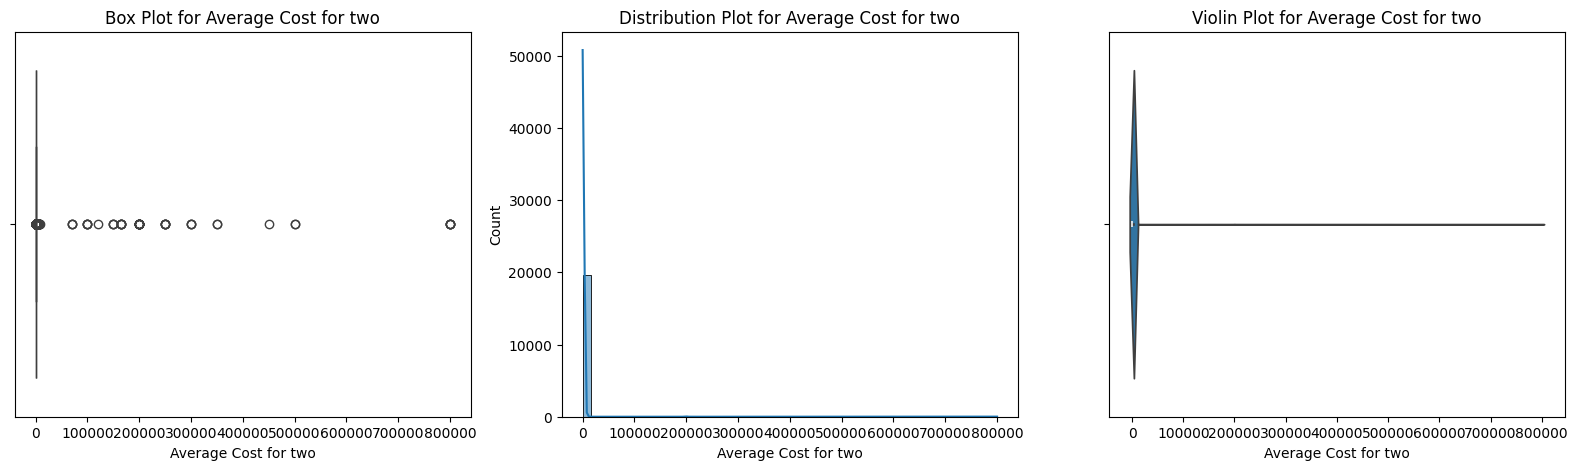

before Skewness for Price range is 0.6291306422146217


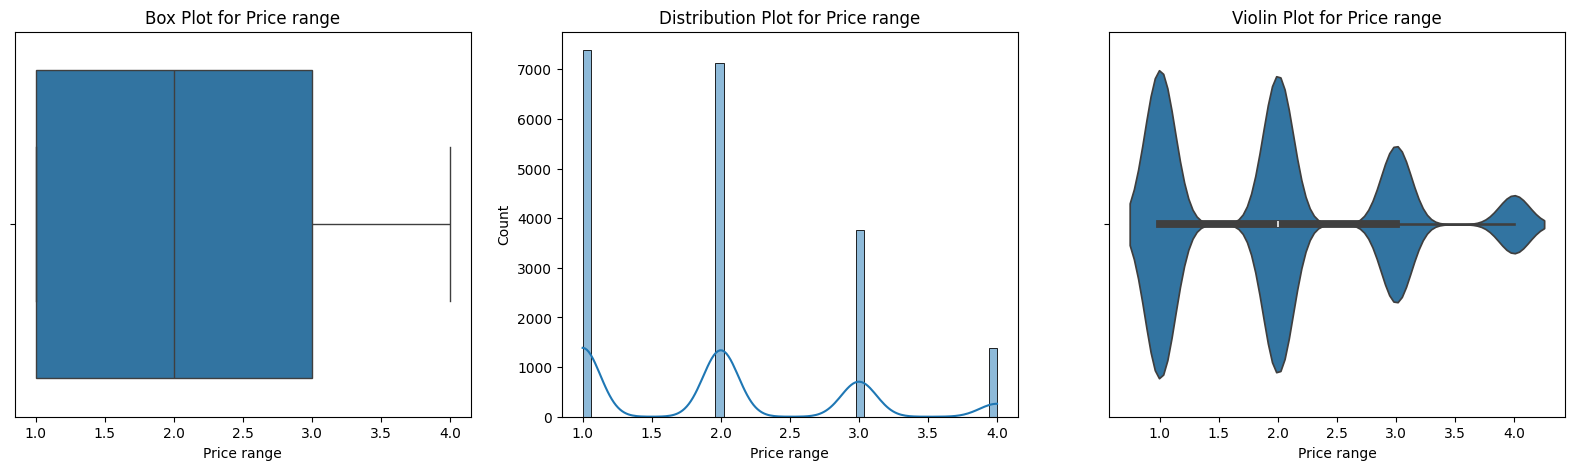

before Skewness for Aggregate rating is -1.2197070345487153


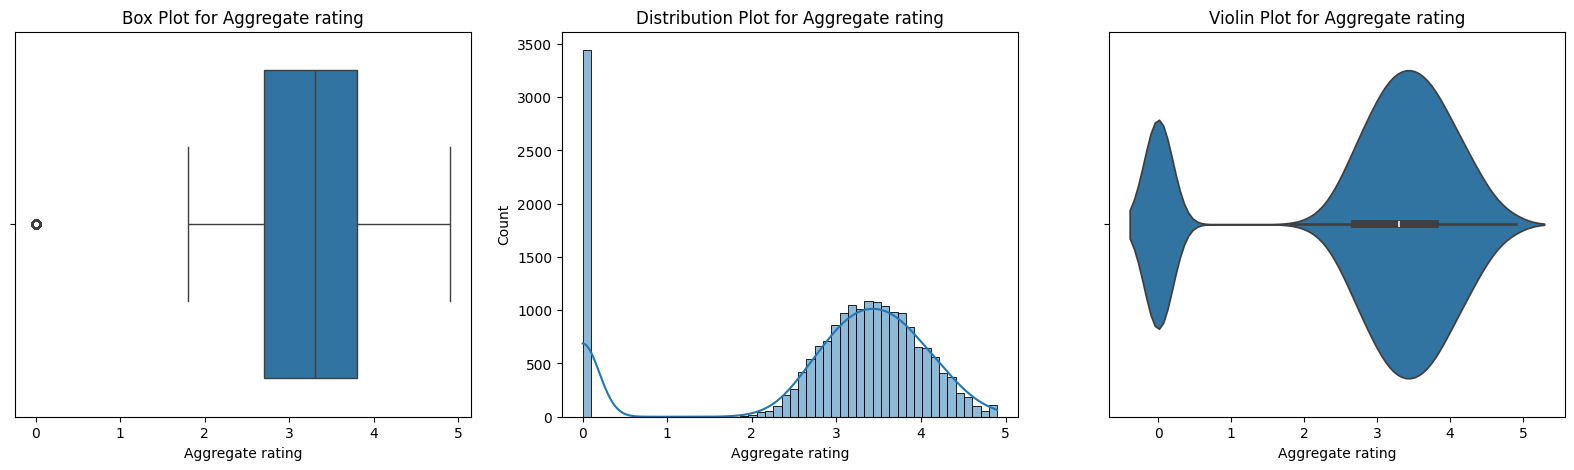

before Skewness for Votes is 7.828802927361956


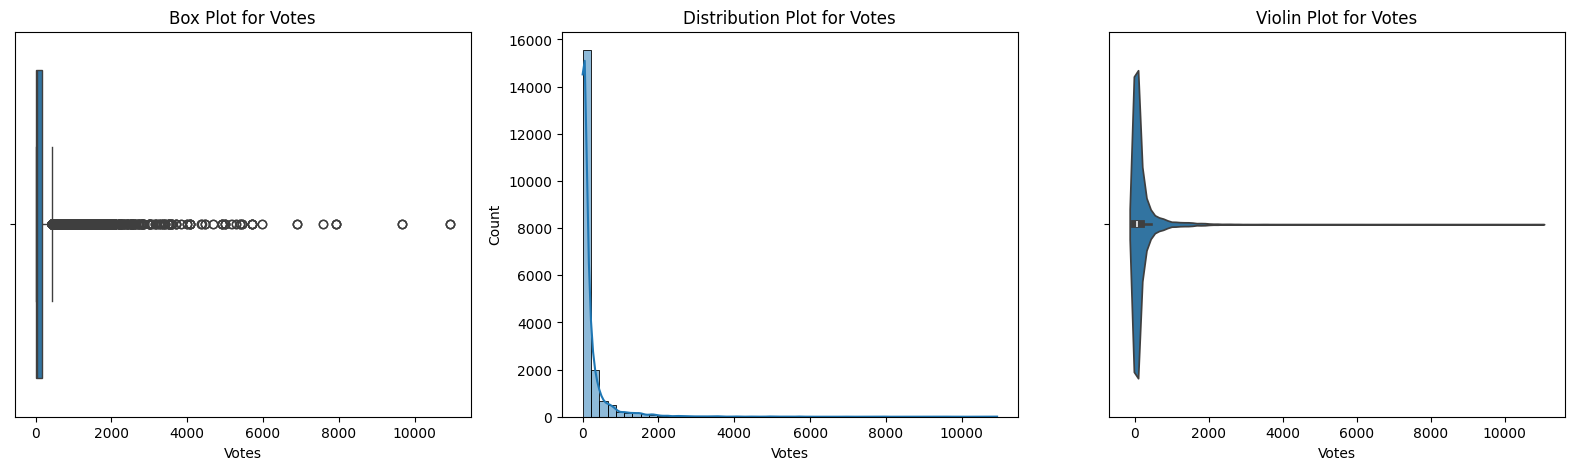

before Skewness for INR_currency is 8.15620736950783


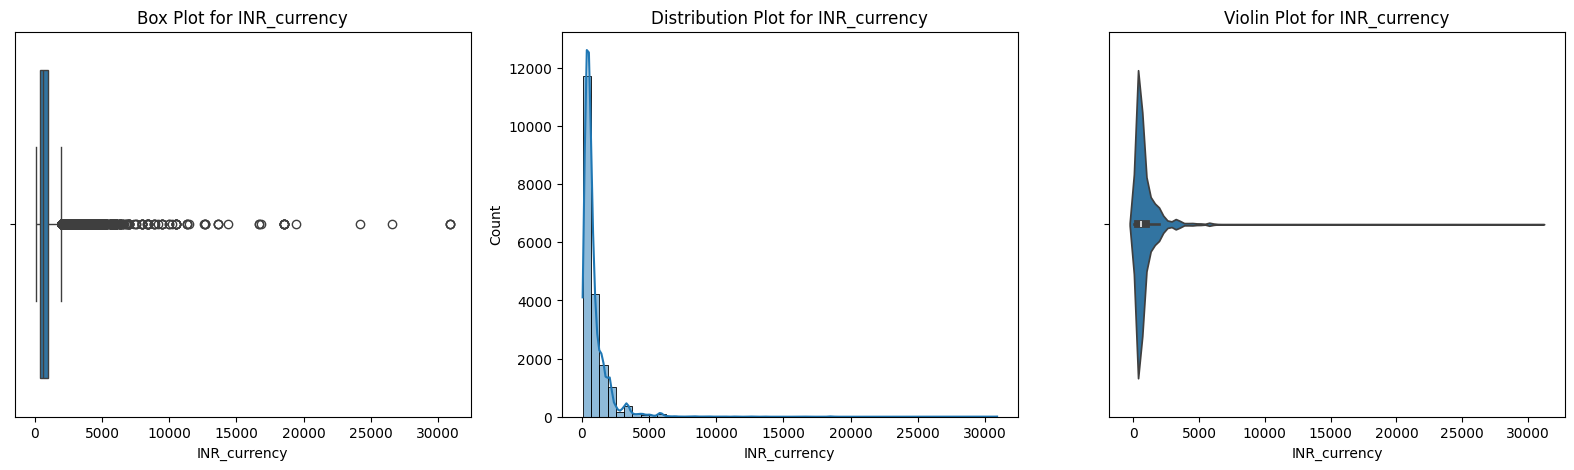

In [33]:
for i in df_exploded.columns:
    if (df_exploded[i].dtype == 'float64') | (df_exploded[i].dtype == 'int64') | (df_exploded[i].dtype == 'int32'):
        print(f"before Skewness for {i} is {df_exploded[i].skew()}")
        plot(df_exploded,i)

In [34]:
df_exploded.to_excel("zomato_exploded.xlsx",index=False)
df_all.to_excel("zomato.xlsx",index=False)

In [43]:
df_di = df[df["Has Table booking"] == "Yes"]["Has Table booking"].str.replace("Yes","Dine-in")
df_on = df[df["Has Online delivery"] == "Yes"]["Has Online delivery"].str.replace("Yes","Online")

In [58]:
# why not delivering now? in that case was it delivered before and not now?
# why there is no table booking? and online booking?

# df_all["Price range"] == 1]  average cost per 2 is  below 500
# df_all["Price range"] == 2] average cost per 2 is having  in moslty less than 1000 some below 2000 as well
# df_all["Price range"] == 3] average cost per 2 is having  in lakhs as well
# df_all["Price range"] == 4] average cost per 2 is on average is 2000